## Movie Reviews Sentiment Classification

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
data = pd.read_csv('D:/ML_learning/Movie_review_sentiment/Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


### Dataset contains 40k movie reviews from IMDB, we see that there are 2 columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

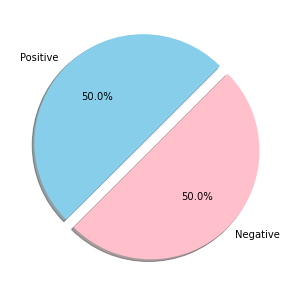

In [3]:
## Now let’s visualize the distribution of the data
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
positive=data[data['label']==1]
negative=data[data['label']==0]
ck=[positive['label'].count(),negative['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))


### Data cleaning

#### Then we will import RE, that is, the regular expression operation, we use this library to remove html tags <> or. So whenever we come across these tags, we replace them with an empty string. Then we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /. We will change the emojis towards the end to get a clean set of text:

In [4]:
import re
def preprocessor(text):
             text = re.sub('<[^>]*>','',text)
             emojis = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text = re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

In [5]:
## Perform stemming using porter

from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [6]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [8]:
from wordcloud import WordCloud
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

In [13]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    words = [word for word in words.split() if(word!='movie' and word!='film')]
    cleaned_word = " ".join(words)
    
    wordcloud = WordCloud(stopwords=stop, background_color=color, width=2500, height=2000).generate(cleaned_word)
    
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words are as follows


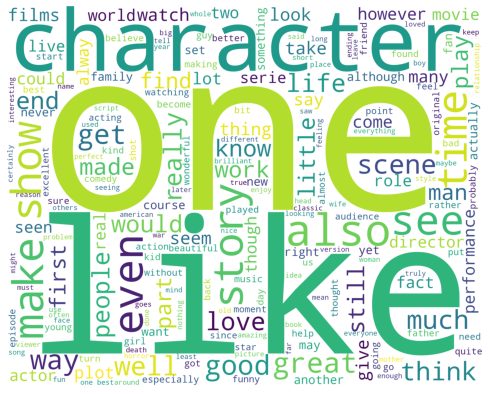

In [15]:
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')

#### The positive words that are highlighted are love, excellent, perfect, good, beautiful, kind, excellent.

Negative words are as follows


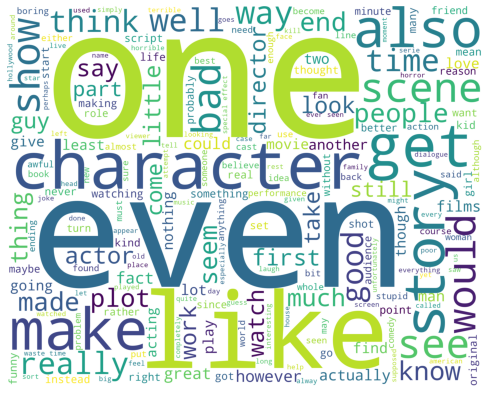

In [16]:
print("Negative words are as follows")
wordcloud_draw(negdata)

#### The negative words that are highlighted are: horrible, wasteful, problem, stupid, horrible, bad, poor.

### Machine learning model 

In [21]:
## Perform TF-IDF vectorizer to convert text data into vectors to fit the ML model

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2'
                      ,smooth_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

In [28]:
## Train test split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [29]:
## Fit the logistic regression model

from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   58.6s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min finished


Accuracy: 0.89575


In [30]:
## Training the model using Naive Bayes

from sklearn.naive_bayes import MultinomialNB
spam_detect = MultinomialNB().fit(X_train, y_train)

In [31]:
y_pred_NB = spam_detect.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB))

Accuracy: 0.8530833333333333
